In [ ]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


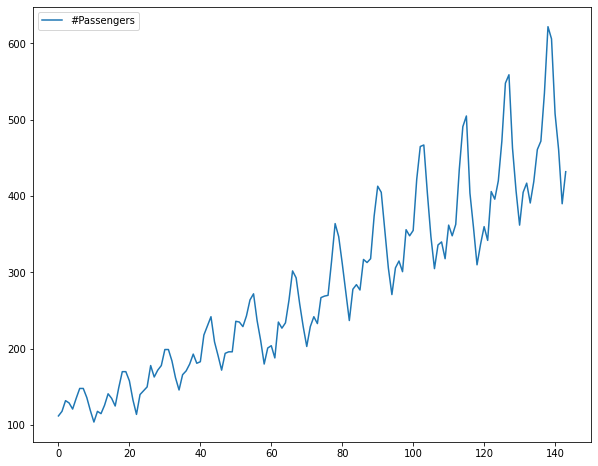

In [ ]:
df.plot(figsize=(10,8))

In [ ]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df['ds']=pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
from fbprophet import Prophet

In [ ]:
#Intialize the Model
model=Prophet()

In [ ]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [ ]:
# create future dates of 365
future_dates=model.make_future_dataframe(periods=365)

In [ ]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [ ]:
prediction=model.predict(future_dates)

In [ ]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.727984,55.017446,112.679420,106.727984,106.727984,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,-21.920631,0.0,0.0,0.0,84.807353
1,1949-02-01,108.901201,49.264802,105.881841,108.901201,108.901201,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,-30.682847,0.0,0.0,0.0,78.218354
2,1949-03-01,110.864107,83.791864,140.589989,110.864107,110.864107,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,-0.502710,0.0,0.0,0.0,110.361397
3,1949-04-01,113.037323,79.209788,137.474149,113.037323,113.037323,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,-5.185501,0.0,0.0,0.0,107.851823
4,1949-05-01,115.140437,83.974375,137.502917,115.140437,115.140437,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,-3.788702,0.0,0.0,0.0,111.351735


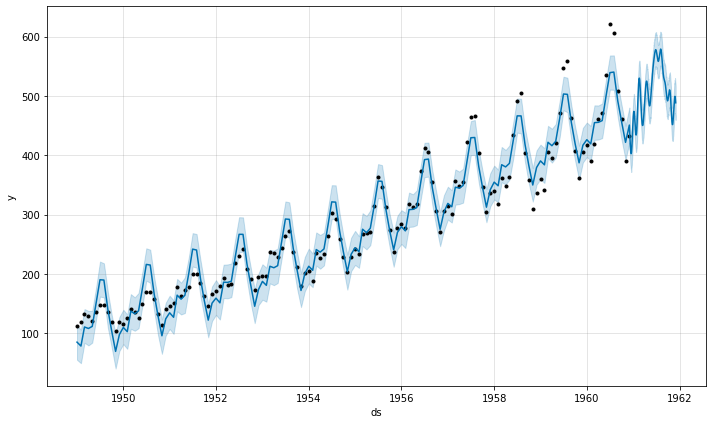

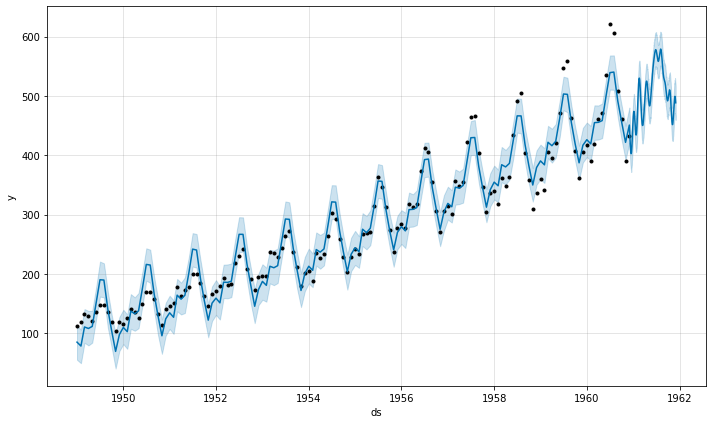

In [ ]:
#plot the model prediction
model.plot(prediction)

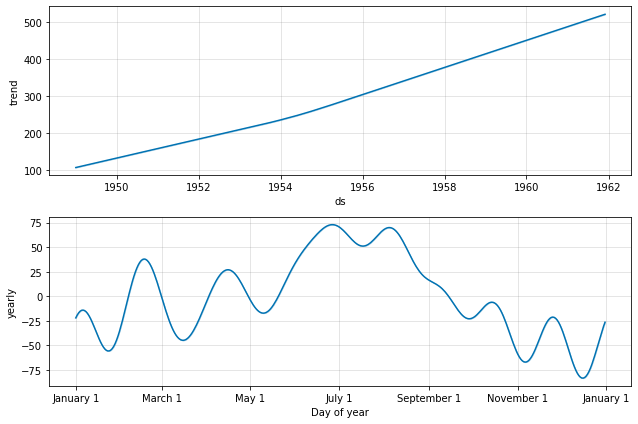

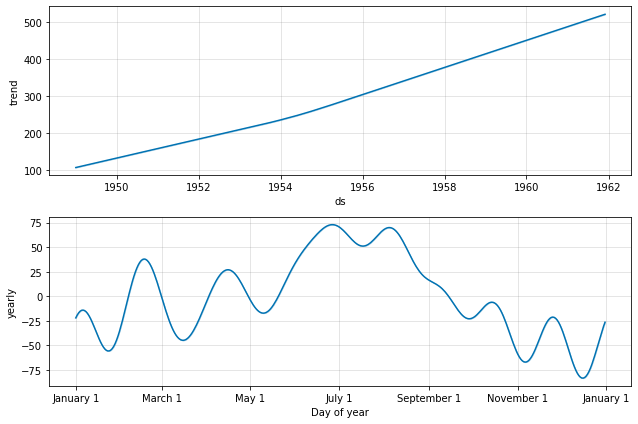

In [ ]:
#visualize each component [Trends, Yearly]
model.plot_components(prediction)

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv= cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.013969,157.791996,158.206334,150,1951-01-18
1,1951-03-01,171.224502,170.480330,171.813261,178,1951-01-18
2,1951-04-01,159.628157,158.212996,160.836578,163,1951-01-18
3,1951-05-01,145.666500,143.325604,147.712051,172,1951-01-18
4,1951-06-01,180.679910,177.394350,183.609084,178,1951-01-18


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
223,1960-08-01,524.361022,498.240821,551.187013,606,1959-12-02
224,1960-09-01,485.319957,459.218579,511.065351,508,1959-12-02
225,1960-10-01,452.658227,425.043865,478.865412,461,1959-12-02
226,1960-11-01,423.892925,399.101970,449.707815,390,1959-12-02
227,1960-12-01,446.588198,418.989594,472.105883,432,1959-12-02


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818


In [ ]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1083.476338,32.916202,25.895616,0.078758,0.073725,0.227273
1,42 days,1009.201759,31.767936,25.246674,0.077080,0.073725,0.181818
2,46 days,906.510734,30.108317,24.749820,0.079413,0.084057,0.136364
3,47 days,1039.076713,32.234713,26.867165,0.082299,0.085796,0.136364
4,48 days,1027.847500,32.060061,26.277771,0.080195,0.085796,0.181818
...,...,...,...,...,...,...,...
165,359 days,767.192965,27.698248,21.737830,0.069323,0.061258,0.295455
166,360 days,770.736150,27.762135,22.023183,0.070200,0.061258,0.272727
167,362 days,860.697354,29.337644,23.247995,0.069206,0.061258,0.272727
168,364 days,834.406224,28.886091,22.181478,0.066297,0.051361,0.272727
